In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df = pd.read_csv(r'mymoviedb.csv', engine='python')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,12/15/2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,3/1/2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2/25/2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,11/24/2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,12/22/2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [114]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [115]:
df.duplicated().sum() # checking title name of movie there is movie like duplicated or not

np.int64(0)

In [119]:
df = df.dropna(subset=['Vote_Count'])
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'])
print(df['Vote_Count'].dtypes)



ValueError: Unable to parse string "en" at position 1105

In [118]:
df = df.dropna(subset=['Vote_Average'])
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'])
print(df['Vote_Average'].dtypes)

ValueError: Unable to parse string "Animation" at position 1105

In [ ]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9826.0,9826.000000,9826.000000,9826.000000
mean,1970.0,40.323951,1392.943721,6.439467
std,0.0,108.879332,2611.303856,1.129797
min,1970.0,13.354000,0.000000,0.000000
25%,1970.0,16.128250,146.000000,5.900000
50%,1970.0,21.195000,444.000000,6.500000
75%,1970.0,35.179250,1376.000000,7.100000
max,1970.0,5083.954000,31077.000000,10.000000


In [98]:
df = df.dropna(subset=['Release_Date'])  # if you want to remove invalid dates


df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors = 'coerce')
# Use errors='coerce' in pd.to_datetime() to automatically convert 
# invalid date strings to NaT (Not a Time):
print(df['Release_Date'].dtypes)

datetime64[ns]


In [99]:
df['Release_Date'] = df['Release_Date'].dt.year

df['Release_Date'].dtypes

dtype('float64')

In [100]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021.0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022.0,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022.0,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021.0,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021.0,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping the columns

In [101]:

cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [102]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,6.3,Thriller
3,2021.0,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,7,"Action, Adventure, Thriller, War"


categorizing Vote_Average column

In [122]:
import pandas as pd

def catigorize_col(df, col, labels):
    
    df[col] = pd.to_numeric(df[col], errors='coerce')

    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df
           
 

In [123]:
labels = ['not_popular', 'below_avg', 'average', 'popular']

catigorize_col(df, 'Vote_Average', labels)

df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [124]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,12/15/2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,3/1/2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2/25/2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,below_avg,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,11/24/2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,popular,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,12/22/2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,average,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [127]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [129]:
# removing nan value or duplicate

df.dropna(inplace=True)

# check the nan value
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [130]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,12/15/2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,3/1/2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2/25/2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,below_avg,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,11/24/2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,popular,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,12/22/2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,average,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [131]:

cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [135]:
df = df.dropna(subset=['Release_Date'])  # if you want to remove invalid dates


df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors = 'coerce')
# Use errors='coerce' in pd.to_datetime() to automatically convert 
# invalid date strings to NaT (Not a Time):
print(df['Release_Date'].dtypes)

datetime64[ns]


In [136]:
df['Release_Date'] = df['Release_Date'].dt.year

df['Release_Date'].dtypes

dtype('int32')

In [137]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


# we split genres into a list to have only one genre per row for each movie

In [138]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [ ]:
#casting column into category, fun. use astype

df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  int32   
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  object  
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(1), int32(1), object(2)
memory usage: 749.6+ KB


In [141]:
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

Data Visuialization

In [142]:
sns.set_style('whitegrid')

what is the most frequent genre of movies released on Netflix?

In [144]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

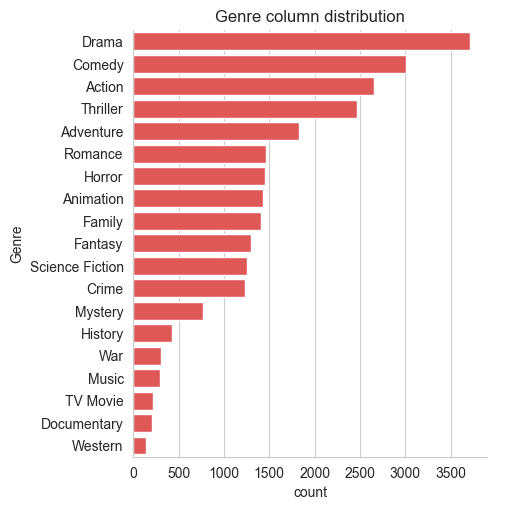

In [147]:
sns.catplot(y = 'Genre', data = df, kind = 'count',
            order = df['Genre'].value_counts().index,
              color = "#f54242")

plt.title('Genre column distribution')
plt.show()

which has the highest votes in vote avg column

In [148]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


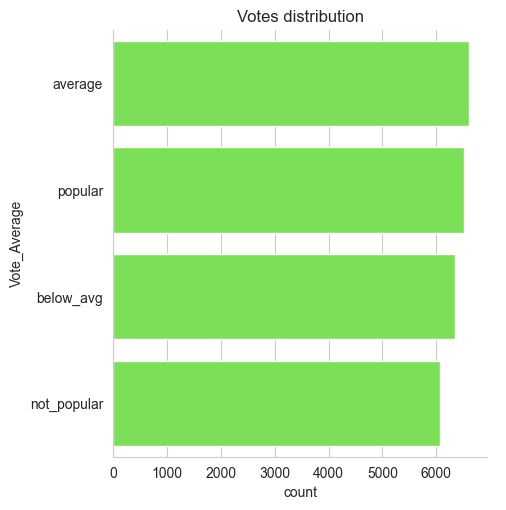

In [150]:
sns.catplot(y = 'Vote_Average', data=df, kind = 'count',
            order = df['Vote_Average'].value_counts().index,
             color="#72f542" )

plt.title('Votes distribution')
plt.show()

# What movie got the highest popularity? what its genre?

In [151]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [153]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


What movie got the lowest popolarity? what its genre?

In [154]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152,average,History
25548,1984,Threads,13.354,186,popular,War
25549,1984,Threads,13.354,186,popular,Drama
25550,1984,Threads,13.354,186,popular,Science Fiction


# which year has the most filmed movie?

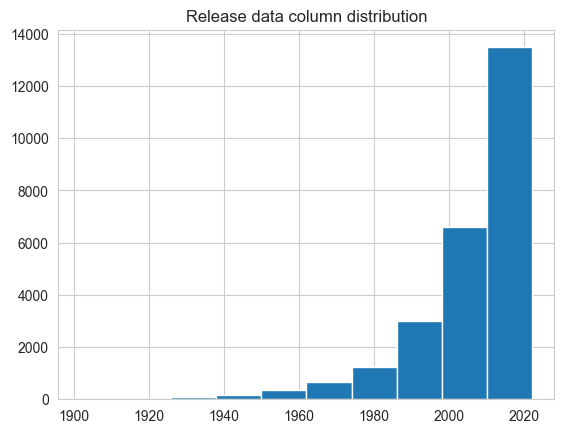

In [155]:
df['Release_Date'].hist()
plt.title('Release data column distribution')
plt.show()

# Conclusion

 Q1: What is the most frequent 
genre in the dataset?


 Drama genre is the most frequent genre in our dataset and has appeared more than
 14% of the times among 19 other genres.

Q2: What genres has highest votes ?

we have 25.5% of our dataset with popular vote (6520 rows). 
Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities
 

Q3: What movie got the highest 
popularity ? what's its 
Action , 
genre ?

 Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
 genres of 
Adventure and 
Sience Fiction 

 Q4: What movie got the lowest 
popularity ? what's its 
genre ?

 The united states, thread' has the highest lowest rate in our dataset 
and it has genres of music
 , drama
 , 'war', 'sci-fi' and history`.


 Q5: Which year has the most filmmed movies?

 year 
2020 has the highest filmming rate in our dataset.